## Imports

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
#ML libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

##Yahoo finance trial

In [ ]:
from google.colab import drive
drive.mount('drive')


Mounted at drive


In [ ]:
!pip install yfinance



     |████████████████████████████████| 6.3MB 7.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=82a7daecafc2d9cf6495ca0e32a2a3454aadcb4a9ed23c8f232f65a96fdffc0d
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as pd
import  as yf
import csv

ModuleNotFoundError: ignored

In [ ]:
# using yfinance library to download stock historical data from 1 jan 2016 to 1 may 2021
stock_symbol = ''
df = yf.download(stock_symbol,
                  start='2016-01-01', 
                  end='2021-05-01', 
                  progress=False)

df.to_csv(stock_symbol + '.csv')
# if to_csv didn't save to drive, mount drive then run the following code:
# !cp file_name.csv "directory location in drive"




cp: cannot create regular file '/content/drive/MyDrive/ShaddyMyDaddy/Final Submission/Datasets': No such file or directory


## Loading Data

In [ ]:
import os
os.chdir("/content/drive/MyDrive/CryptoProject/Final Submission/Datasets") 
directory = "/content/drive/MyDrive/CryptoProject/Final Submission/Datasets"
dataset = pd.read_csv("/content/drive/MyDrive/CryptoProject/Final Submission/BTC-USD.csv")
dataset["Date"] = pd.to_datetime(dataset.Date)
# merging datasets from different sources into one final dataset
for root,dirs,files in os.walk(directory):
    for file in files:
       if file.endswith(".csv"):
           data = pd.read_csv(file) 
           print(file)
           
           data["Date"] = pd.to_datetime(data.Date)
           dataset = dataset.merge(data,how='outer',left_on='Date', right_on='Date')
           print(dataset.describe)
           



market-cap.csv
<bound method NDFrame.describe of            Date          Open  ...        Volume    market-cap
0    2016-01-01    430.721008  ...  3.627890e+07           NaN
1    2016-01-02    434.622009  ...  3.009660e+07  6.513881e+09
2    2016-01-03    433.578003  ...  3.963380e+07           NaN
3    2016-01-04    430.061005  ...  3.847750e+07           NaN
4    2016-01-05    433.069000  ...  3.452260e+07  6.484783e+09
...         ...           ...  ...           ...           ...
1943 2021-04-27  54030.304690  ...  4.944822e+10           NaN
1944 2021-04-28  55036.636720  ...  4.800057e+10  1.020000e+12
1945 2021-04-29  54858.089840  ...  4.608893e+10           NaN
1946 2021-04-30  53568.664060  ...  5.239593e+10           NaN
1947 2021-05-01  57728.312500  ...  4.330303e+10           NaN

[1948 rows x 8 columns]>
dowjones.csv
<bound method NDFrame.describe of            Date          Open  ...  Open-dowjones  Close-dowjones
0    2016-01-01    430.721008  ...            NaN       

In [ ]:
dataset.describe

<bound method NDFrame.describe of            Date          Open  ...   Open_BIDU  Close_BIDU
0    2016-01-01    430.721008  ...         NaN         NaN
1    2016-01-02    434.622009  ...         NaN         NaN
2    2016-01-03    433.578003  ...         NaN         NaN
3    2016-01-04    430.061005  ...  181.289993  184.029999
4    2016-01-05    433.069000  ...  186.710007  187.369995
...         ...           ...  ...         ...         ...
1945 2021-04-29  54858.089840  ...  218.789993  212.289993
1946 2021-04-30  53568.664060  ...  210.490006  210.330002
1947 2021-05-01  57728.312500  ...         NaN         NaN
1948 2015-12-31           NaN  ...         NaN         NaN
1949 2021-05-03           NaN  ...         NaN         NaN

[1950 rows x 40 columns]>

In [ ]:
#dataset.to_csv('final.csv')
import pandas as pd
import os
import csv

In [ ]:
import os
os.chdir("/content/drive/MyDrive/CryptoProject/Final Submission/sentiment") 
directory = "/content/drive/MyDrive/CryptoProject/Final Submission/sentiment"
dataset = pd.read_csv("/content/drive/MyDrive/CryptoProject/Final Submission/sentiment/please1.csv")
dataset['Date'] = pd.to_datetime(dataset.Date)
data = pd.read_csv("/content/drive/MyDrive/CryptoProject/Final Submission/neutral18-21-new.csv")
data['Date'] = pd.to_datetime(data.Date)
  
dataset = dataset.merge(data,how='outer',left_on='Date', right_on='Date')
#dataset['Date'] = dataset['Date'].dt.strftime('%d-%m-%Y')
# merging datasets from different sources into one final dataset
#for root,dirs,files in os.walk(directory):
#   for file in files:
#       if file.endswith("yre.csv"):
#           data = pd.read_csv(file) 
#           print(file)

#           #data['Date'] = data['Date'].dt.strftime('%d-%m-%Y')
#           data['Date'] = pd.to_datetime(data.Date)
  
#           dataset = dataset.merge(data,how='outer',left_on='Date', right_on='Date')
#           print(dataset.describe) 
print(dataset.describe)         
dataset.to_csv('please1.csv')


<bound method NDFrame.describe of       Unnamed: 0_x  Unnamed: 0_x  ...  Unnamed: 0.1_y  neutralVal_y
0                0             0  ...             NaN           NaN
1                1             1  ...             NaN           NaN
2                2             2  ...             NaN           NaN
3                3             3  ...             NaN           NaN
4                4             4  ...             NaN           NaN
...            ...           ...  ...             ...           ...
1948          1948          1948  ...             NaN           NaN
1949          1949          1949  ...           172.0         249.0
1950          1950          1950  ...           195.0         248.0
1951          1951          1951  ...            68.0         260.0
1952          1952          1952  ...           353.0         236.0

[1953 rows x 65 columns]>


In [ ]:
dataset.to_csv('wtf-is-happening.csv')


## Filling NAs 

Since some of our determinants are stocks, and as we know stocks close from friday night to monday morning, while the BTC price is changing throughout the weekend, we filled the NAs values on the weekends with the friday's value. 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CryptoProject/Final Submission/final.csv")
columnsName = df.columns
for i in columnsName:
    df[df[i]==""] = np.NaN

df = df.fillna(method='ffill')
df.to_csv('FinalFixed.csv')

In [ ]:
df = pd.read_csv("/Shared with me/CryptoProject/Final Submission/FinalFixed.csv")



FileNotFoundError: ignored

##Twitter

In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-hz4lk8lh
  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-hz4lk8lh
ERROR: Package 'snscrape' requires a different Python: 3.7.10 not in '~=3.8'


In [ ]:
import snscrape.modules.twitter as sntwitter

def get_tweets_by_search_query(query, start_date, end_date, count):
  tweets = []
  sns_query = query + " since:" + str(start_date).split()[0] + " until:" + str(end_date).split()[0]
  print(sns_query, end = ", ")
  i = -1
  for i,tweet in enumerate(sntwitter.TwitterSearchScraper(sns_query).get_items()) :
    if i == count:
      break
    if tweet.user.username.lower() == query[1:].lower():
      tweets.append(Tweet(tweet.id, tweet.renderedContent, tweet.date, tweet.user.username))
  print("total: ", i + 1 , "matching tweets:", len(tweets))
  if len(tweets) > 1000:
    tweets = random.sample(tweets, 1000)
  return tweets

get_tweets_by_search_query("bitcoin", "2020-06-01", "2020-07-31", 100)

ModuleNotFoundError: ignored

## Cleaning Twitter Data

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
import re
stop_words = set(stopwords.words('english'))


tweets = pd.read_csv("/content/drive/MyDrive/market_tweets_2018-9-2021-5.csv", encoding='latin-1')
tweets = tweets.drop_duplicates(subset=['Text'])

df = pd.DataFrame(tweets)
df = df.dropna()
tw_list = pd.DataFrame(df)

In [ ]:
df

,Date,Text
0,2018-09-26 21:30:09+00:00,1 BTC Price: Bitstamp 6494.28 USD Coinbase 649...
1,2018-09-26 23:59:14+00:00,Developers of the Simple Ledger Protocol (SLP)...
2,2018-09-26 23:59:13+00:00,Bitcoin Unicorn @CirclePay Launches USD-Pegged...
3,2018-09-26 23:59:10+00:00,"Despite Ban, 25 Google Play Apps Found to Cryp..."
4,2018-09-26 23:59:07+00:00,Bitcoin price index https://t.co/o7UcHJUhC6 #U...
...,...,...
477950,2021-05-05 22:49:31+00:00,"$doge / $btc: +8% value, -5% volume at #Binanc..."
477951,2021-05-05 22:49:17+00:00,Ethereum 3526 dolar olmuÅ bizim ayÄ±cÄ±lÄ±kla...
477952,2021-05-05 22:49:10+00:00,PayPal profit tops estimates on digital paymen...
477953,2021-05-05 22:49:10+00:00,If any Bitcoin person talks about how DOGE is ...


In [ ]:
df = df.dropna()

In [ ]:
tw_list = pd.DataFrame(df)

In [ ]:
tw_list

,Date,Text
0,2018-09-26 21:30:09+00:00,1 BTC Price: Bitstamp 6494.28 USD Coinbase 649...
1,2018-09-26 23:59:14+00:00,Developers of the Simple Ledger Protocol (SLP)...
2,2018-09-26 23:59:13+00:00,Bitcoin Unicorn @CirclePay Launches USD-Pegged...
3,2018-09-26 23:59:10+00:00,"Despite Ban, 25 Google Play Apps Found to Cryp..."
4,2018-09-26 23:59:07+00:00,Bitcoin price index https://t.co/o7UcHJUhC6 #U...
...,...,...
477950,2021-05-05 22:49:31+00:00,"$doge / $btc: +8% value, -5% volume at #Binanc..."
477951,2021-05-05 22:49:17+00:00,Ethereum 3526 dolar olmuÅ bizim ayÄ±cÄ±lÄ±kla...
477952,2021-05-05 22:49:10+00:00,PayPal profit tops estimates on digital paymen...
477953,2021-05-05 22:49:10+00:00,If any Bitcoin person talks about how DOGE is ...


In [ ]:
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub(r'\@\w+|\#','', x)
rt = lambda x: re.sub(r'(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)',' ',x)
tw_list["Text"] = tw_list.Text.map(remove_rt).map(rt)
tw_list["Text"] = tw_list.Text.str.lower()

NameError: ignored

In [ ]:
!pip3 install langdetect

     |████████████████████████████████| 983kB 4.1MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993223 sha256=f4782080e249d093ff8ad2430a6e377aad54f00d441e27d55a28267374206b67
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
tw_list["Text"].head()

0    1 BTC Price: Bitstamp 6494.28 USD Coinbase 649...
1    Developers of the Simple Ledger Protocol (SLP)...
2    Bitcoin Unicorn @CirclePay Launches USD-Pegged...
3    Despite Ban, 25 Google Play Apps Found to Cryp...
4    Bitcoin price index https://t.co/o7UcHJUhC6 #U...
Name: Text, dtype: object

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
tw_list[["polarity", "subjectivity"]] = tw_list["Text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
tw_list

,Date,Text,polarity,subjectivity
0,2018-09-26 21:30:09+00:00,1 BTC Price: Bitstamp 6494.28 USD Coinbase 649...,0.000000,0.000000
1,2018-09-26 23:59:14+00:00,Developers of the Simple Ledger Protocol (SLP)...,0.045455,0.353896
2,2018-09-26 23:59:13+00:00,Bitcoin Unicorn @CirclePay Launches USD-Pegged...,0.000000,0.000000
3,2018-09-26 23:59:10+00:00,"Despite Ban, 25 Google Play Apps Found to Cryp...",0.000000,0.000000
4,2018-09-26 23:59:07+00:00,Bitcoin price index https://t.co/o7UcHJUhC6 #U...,0.000000,0.000000
...,...,...,...,...
477950,2021-05-05 22:49:31+00:00,"$doge / $btc: +8% value, -5% volume at #Binanc...",0.000000,0.000000
477951,2021-05-05 22:49:17+00:00,Ethereum 3526 dolar olmuÅ bizim ayÄ±cÄ±lÄ±kla...,0.000000,0.000000
477952,2021-05-05 22:49:10+00:00,PayPal profit tops estimates on digital paymen...,0.000000,0.000000
477953,2021-05-05 22:49:10+00:00,If any Bitcoin person talks about how DOGE is ...,0.050000,0.225000


In [ ]:

for index, row in tw_list["Text"].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score["neg"]
 neu = score["neu"]
 pos = score["pos"]
 comp = score["compound"]
 if neg > pos:
  tw_list.loc[index, "sentiment"] = "negative"
 elif pos > neg:
  tw_list.loc[index, "sentiment"] = "positive"
 else:
  tw_list.loc[index, "sentiment"] = "neutral"
  tw_list.loc[index, "neg"] = neg
  tw_list.loc[index, "neu"] = neu
  tw_list.loc[index, "pos"] = pos
  tw_list.loc[index, "compound"] = comp
tw_list.head(10)


In [ ]:
tw_list.to_csv('Sentiment18-21.csv')

In [ ]:
sentiment1 = pd.read_csv("/content/drive/MyDrive/Sentiment16-18.csv",lineterminator='\n')

In [ ]:
# sentiment1.head()
sentiment1.dtypes


Unnamed: 0        int64
Date             object
Text             object
polarity        float64
subjectivity    float64
sentiment        object
neg             float64
neu             float64
pos             float64
compound        float64
dtype: object

In [ ]:
sentiment2 = pd.read_csv("/content/drive/MyDrive/Sentiment18-21.csv",lineterminator='\n')

In [ ]:
sentimentData2 = sentiment2[["Date", "Text", "sentiment"]].copy()

In [ ]:

sentimentData1 = sentiment1[["Date ", "Text", "sentiment"]].copy()

In [ ]:
sentimentData1= sentimentData1.drop("Date" , axis=1)

In [ ]:
sentimentData1.head()

,Date,Text,sentiment
0,2016-01-01 19:10:06+00:00,We are still accepting @Bitcoin in to #2016\n\...,positive
1,2016-01-01 19:10:08+00:00,Buying USD$100 in Bitcoin 1 year ago [THEN: US...,positive
2,2016-01-01 19:11:04+00:00,La OFAC y el primer bloqueo en el ecosistema B...,neutral
3,2016-01-01 19:11:51+00:00,Year in Review: These were the 10 most importa...,positive
4,2016-01-01 19:12:30+00:00,BTC: Andreas Antonopoulos: Third-tier Bitcoin ...,neutral


In [ ]:
sentimentData1["Date "] = pd.to_datetime(sentimentData1["Date "])

In [ ]:
sentimentData2["Date"] = pd.to_datetime(sentimentData2["Date"])

In [ ]:
import datetime as dt

sentimentData1["Date "] = sentimentData1["Date "].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m'))  

In [ ]:
import datetime as dt

sentimentData2["Date"] = sentimentData2["Date"].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m'))  

In [ ]:
positive=sentimentData1[sentimentData1["sentiment"]=="positive"]["Date "].value_counts() 
positive.loc[~positive.index.isin(sentimentData1.loc[sentimentData1.sentiment == 'positive','Date '].unique())]=0

In [ ]:
positive2=sentimentData2[sentimentData2["sentiment"]=="positive"]["Date"].value_counts() 
positive2.loc[~positive2.index.isin(sentimentData2.loc[sentimentData2.sentiment == 'positive','Date'].unique())]=0

In [ ]:
positive = positive.to_frame()


In [ ]:
positive2 = positive2.to_frame()
positive2.reset_index(inplace=True)
positive2 = positive2.rename(columns={'index': 'Date', 'Date': 'positiveVal'})
positive2 = positive2.sort_values("Date")
positive2

,Date,positiveVal
83,2018-01-10,192
485,2018-01-11,165
245,2018-01-12,177
823,2018-02-10,146
921,2018-02-11,134
...,...,...
684,2021-30-01,155
2,2021-30-03,219
864,2021-30-04,142
890,2021-31-01,139


In [ ]:
positive.reset_index(inplace=True)

In [ ]:
positive = positive.rename(columns={'index': 'Date', 'Date ': 'positiveVal'})

In [ ]:
positive = positive.sort_values("Date")

In [ ]:
positive

,Date,positiveVal
281,2016-01-01,150
185,2016-01-02,157
306,2016-01-03,149
372,2016-01-04,145
194,2016-01-05,156
...,...,...
641,2018-31-01,131
570,2018-31-03,135
545,2018-31-05,136
214,2018-31-07,155


In [ ]:
neutral=sentimentData1[sentimentData1["sentiment"]=="neutral"]["Date "].value_counts() 
neutral.loc[~neutral.index.isin(sentimentData1.loc[sentimentData1.sentiment == 'neutral','Date '].unique())]=0

In [ ]:
neutral2=sentimentData2[sentimentData2["sentiment"]=="neutral"]["Date"].value_counts() 
neutral2.loc[~neutral2.index.isin(sentimentData2.loc[sentimentData2.sentiment == 'neutral','Date'].unique())]=0
neutral2 = neutral2.to_frame()
neutral2.reset_index(inplace=True)
neutral2 = neutral2.rename(columns={'index': 'Date', 'Date': 'neutralVal'})
neutral2 = neutral2.sort_values("Date")
neutral2

,Date,neutralVal
359,2018-01-10,236
192,2018-01-11,248
770,2018-01-12,209
75,2018-02-10,259
101,2018-02-11,256
...,...,...
321,2021-30-01,238
866,2021-30-03,201
158,2021-30-04,251
170,2021-31-01,249


In [ ]:
neutral = neutral.to_frame()  

In [ ]:
neutral.reset_index(inplace=True)
# neutral['2016-01-01']

In [ ]:
neutral = neutral.rename(columns={'index': 'Date', 'Date ': 'neutralVal'})
neutral = neutral.sort_values("Date")

In [ ]:
neutral

,Date,neutralVal
56,2016-01-01,307
220,2016-01-02,283
635,2016-01-03,251
339,2016-01-04,272
266,2016-01-05,278
...,...,...
841,2018-31-01,235
429,2018-31-03,265
173,2018-31-05,289
570,2018-31-07,255


In [ ]:
negative=sentimentData1[sentimentData1["sentiment"]=="negative"]["Date "].value_counts() 

negative.loc[~negative.index.isin(sentimentData1.loc[sentimentData1.sentiment == 'negative','Date '].unique())]=0

In [ ]:
negative2=sentimentData2[sentimentData2["sentiment"]=="negative"]["Date"].value_counts() 
negative2.loc[~negative2.index.isin(sentimentData2.loc[sentimentData2.sentiment == 'negative','Date'].unique())]=0
negative2 = negative2.to_frame()
negative2.reset_index(inplace=True)
negative2 = negative2.rename(columns={'index': 'Date', 'Date': 'negativeVal'})
negative2 = negative2.sort_values("Date")
negative2

,Date,negativeVal
915,2018-01-10,61
713,2018-01-11,73
719,2018-01-12,73
387,2018-02-10,88
308,2018-02-11,92
...,...,...
930,2021-30-01,57
904,2021-30-03,62
829,2021-30-04,68
905,2021-31-01,62


In [ ]:
negative = negative.to_frame()  

In [ ]:

negative.reset_index(inplace=True)
negative = negative.rename(columns={'index': 'Date', 'Date ': 'negativeVal'})


In [ ]:
negative = negative.sort_values("Date")
negative

,Date,negativeVal
914,2016-01-01,43
910,2016-01-02,44
403,2016-01-03,74
741,2016-01-04,55
929,2016-01-05,41
...,...,...
43,2018-31-01,113
296,2018-31-03,80
739,2018-31-05,55
550,2018-31-07,65


## Merging sentiment analysis with main dataset

Hamza, there are 6 dataframes, 3 ( neutral, positive, negative) for the sentiments from 2016-2018 and another 3( neutral2, negative2, positive2) for the sentiments from 2018 till 2021. so we have to merge them with the main dataset according to the date. 

In [ ]:
negative2.to_csv('negative18-21.csv')
neutral2.to_csv('neutral18-21.csv')
positive2.to_csv('positive18-21.csv')

In [ ]:
negative.to_csv('negative16-18.csv')
neutral.to_csv('neutral16-18.csv')
positive.to_csv('positive16-18.csv')

## Splitting Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/FinalDataset17.csv", encoding='latin-1')


In [ ]:
# dataset.columns
dataset = dataset.drop("Unnamed: 0" , axis = 1)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open-dowjones,Close-dowjones,Open_gold,Close_gold,Open_Nikkei,Close_Nikkei,Open_dollar,Close_dollar,Open_Wti,Close_Wti,Europe Brent Spot Price FOB (Dollars per Barrel),Open_KRW,Close_KRW,trade-volume,market-cap,Close_S&P,miners-revenue,transaction-fees-usd,hash-rate,Close_FTSE,difficulty,n-transactions,avg-block-size,Price_Copper,Open_Copper,Price_ShanghaiCSI,Open_ShanghaiCSI,Open_VIX,Close_VIX,Open_STI,Close_STI,Open_BIDU,Close_BIDU,negativeVal,positiveVal,neutralVal
0,1/1/2016,430.721008,436.246002,427.515015,434.334015,434.334015,36278900.0,17148.90039,17148.90039,1063.400024,1075.099976,1276,1247,98.690002,98.870003,7.90,7.74,35.65,1174.109985,1174.109985,1287045.550,6.513881e+09,2012.66,1671419.658,13798.46777,769424.0429,6242.32,NaN,149038,0.579744,2.125,2.071,"3,469.07","3,725.86",22.48,20.700001,2889.229980,2835.969971,181.289993,184.029999,43,150,307
1,1/2/2016,434.622009,436.062012,431.869995,433.437988,433.437988,30096600.0,17148.90039,17148.90039,1063.400024,1075.099976,1276,1247,98.690002,98.870003,7.90,7.74,35.65,1174.109985,1174.109985,1287045.550,6.513881e+09,2012.66,1671419.658,13798.46777,769424.0429,6242.32,1.040000e+11,149038,0.579744,2.125,2.071,"3,469.07","3,725.86",22.48,20.700001,2889.229980,2835.969971,181.289993,184.029999,44,183,243
2,1/3/2016,433.578003,433.743011,424.705994,430.010986,430.010986,39633800.0,17148.90039,17148.90039,1063.400024,1075.099976,1276,1247,98.690002,98.870003,7.90,7.74,35.65,1174.109985,1174.109985,1287045.550,6.513881e+09,2012.66,1671419.658,13798.46777,769424.0429,6242.32,1.040000e+11,149038,0.579744,2.125,2.071,"3,469.07","3,725.86",22.48,20.700001,2889.229980,2835.969971,181.289993,184.029999,74,194,264
3,1/4/2016,430.061005,434.516998,429.084015,433.091003,433.091003,38477500.0,17148.90039,17148.90039,1063.400024,1075.099976,1276,1247,98.690002,98.870003,7.90,7.74,35.65,1174.109985,1174.109985,1287045.550,6.513881e+09,2012.66,1819807.570,14331.03153,769424.0429,6093.43,1.040000e+11,182371,0.641779,2.125,2.071,"3,469.07","3,725.86",22.48,20.700001,2889.229980,2835.969971,181.289993,184.029999,55,146,265
4,1/5/2016,433.069000,434.182007,429.675995,431.959991,431.959991,34522600.0,17158.69922,17158.69922,1075.599976,1078.400024,1245,1243,98.870003,99.400002,7.77,7.67,35.65,1188.900024,1187.359985,1677504.078,6.484783e+09,2016.71,1819807.570,14331.03153,702293.0862,6137.24,1.040000e+11,182371,0.641779,2.142,2.074,"3,478.78","3,382.18",20.75,19.340000,2836.800049,2834.229980,186.710007,187.369995,41,156,270


### Splitting Data

In [ ]:

# dataset["Price_ShanghaiCSI"] = dataset["Price_ShanghaiCSI"].num = float(value.replace(',', ''))

dataset["Price_ShanghaiCSI"] = dataset["Price_ShanghaiCSI"].apply(lambda x: x.replace(',', ''))
dataset["Open_ShanghaiCSI"] = dataset["Open_ShanghaiCSI"].apply(lambda x: x.replace(',', ''))

In [ ]:
dataset["Open_Nikkei"]= dataset["Open_Nikkei"].astype(np.float64) 
dataset["Close_Nikkei"]= dataset["Close_Nikkei"].astype(np.float64) 
dataset["n-transactions"]= dataset["n-transactions"].astype(np.float64) 
dataset["Price_ShanghaiCSI"]= dataset["Price_ShanghaiCSI"].astype(np.float64) 
dataset["Open_ShanghaiCSI"]= dataset["Open_ShanghaiCSI"].astype(np.float64) 
dataset["negativeVal"]= dataset["negativeVal"].astype(np.float64) 
dataset["positiveVal"]= dataset["positiveVal"].astype(np.float64) 
dataset["neutralVal"]= dataset["neutralVal"].astype(np.float64) 


In [ ]:
from sklearn.model_selection import train_test_split

# X = dataset.drop("Close", axis = 1)
# X = X.drop("Date", axis = 1)
miniData = dataset[["Date","Open" , "High" , "Low" ,"Close", "Volume","market-cap"]].copy()
miniData.to_csv("NewDataset.csv")
# X = dataset[["Open" , "High" , "Low" , "Volume"]].copy()
# y = dataset["Close"]

# # Since we need the data to be inorder (not randomly splitted) to predict the prices accurately, we're going to train the data from 1-1-2016
# #till the end of feb and test the model on the data from March 1 till May 5.

# X_train = X[0:1857]
# X_test = X[1858:]
# y_train = y[0:1857]
# y_test = y[1858:]




## Model

In [ ]:
X_train.shape[0] #Rows 
# X_train.shape[1] #Columns

1857

In [ ]:
X_train.dtypes

Open      float64
High      float64
Low       float64
Volume    float64
dtype: object

In [ ]:
new_shaped_Xtrain.shape

(1855, 82)

In [ ]:
y_train.shape

(1857,)

In [ ]:
X_train = X[0:1857]
X_test = X[1858:]
y_train = y[0:1857]
y_test = y[1858:]

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
from keras.layers import Dropout
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras import activations
#Normalizing Data
# scaler = MinMaxScaler(feature_range=(0, 1)) 
scaler = MinMaxScaler() 
Xtrain_scaled_data = scaler.fit_transform(X_train)
#Reshaping Data
Ytrain_scaled_data = scaler.fit_transform(y_train)
Ytrain_scaled_data =Ytrain_scaled_data.reshape(-1,1)
Xtest_scaled_data = scaler.fit_transform(X_test)
Ytest_scaled_data = scaler.fit_transform(y_test)
y_test = y_test.reshape(-1,1)
#Convert to numpy arrays
Xtrain_scaled_data, Ytrain_scaled_data = np.array(Xtrain_scaled_data), np.array(Ytrain_scaled_data)

#Reshape the data into 3-D array

print("before"+ str(Xtrain_scaled_data.shape))
Xtrain_scaled_data = np.reshape(Xtrain_scaled_data, (Xtrain_scaled_data.shape[0],Xtrain_scaled_data.shape[1],1))
print("after"+ str(Xtrain_scaled_data.shape))

# # Initialising the RNN
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (Xtrain_scaled_data.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and Dropout layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and Dropout layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and and Dropout layer
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
model.add(Dense(units = 1))
model.add(Activation('relu'))


optimizer = optimizers.Adam(clipvalue=0.5)
model.compile(optimizer = optimizer, loss = 'mae')

history = model.fit(Xtrain_scaled_data, Ytrain_scaled_data, epochs = 30, batch_size = 30)
#plot history
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['acc'], label='test')
# plt.legend()
# plt.show()



before(1857, 4)
after(1857, 4, 1)
Epoch 1/30
62/62 [==============================] - 7s 11ms/step - loss: 0.0980
Epoch 2/30
62/62 [==============================] - 1s 11ms/step - loss: 0.0164
Epoch 3/30
62/62 [==============================] - 1s 11ms/step - loss: 0.0160
Epoch 4/30
62/62 [==============================] - 1s 10ms/step - loss: 0.0144
Epoch 5/30
62/62 [==============================] - 1s 11ms/step - loss: 0.0138
Epoch 6/30
62/62 [==============================] - 1s 11ms/step - loss: 0.0131
Epoch 7/30
62/62 [==============================] - 1s 11ms/step - loss: 0.0140
Epoch 8/30
62/62 [==============================] - 1s 11ms/step - loss: 0.0126
Epoch 9/30
62/62 [==============================] - 1s 11ms/step - loss: 0.0119
Epoch 10/30
62/62 [==============================] - 1s 11ms/step - loss: 0.0119
Epoch 11/30
62/62 [==============================] - 1s 11ms/step - loss: 0.0106
Epoch 12/30
62/62 [==============================] - 1s 11ms/step - loss: 0.0123
Epo

In [ ]:
X_train = X[0:1857]
X_test = X[1858:]
y_train = y[0:1857]
y_test = y[1858:]

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
window_len = 10
train, test = train_test_split(miniData, test_size=0.052)
targets = test["Close"][window_len:]
# Xtest_scaled_data = scaler.fit_transform(X_test)
# Ytest_scaled_data = scaler.fit_transform(Ytest_scaled_data)
Ytest_scaled_data =Ytest_scaled_data.reshape(-1,1)

Xtest_scaled_data, Ytest_scaled_data = np.array(Xtest_scaled_data), np.array(Ytest_scaled_data)
Xtest_scaled_data = np.reshape(Xtest_scaled_data, (Xtest_scaled_data.shape[0],Xtest_scaled_data.shape[1],1))
preds = model.predict(Xtest_scaled_data).squeeze()
mean_absolute_error(preds, Ytest_scaled_data)

0.042785887488497334

In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

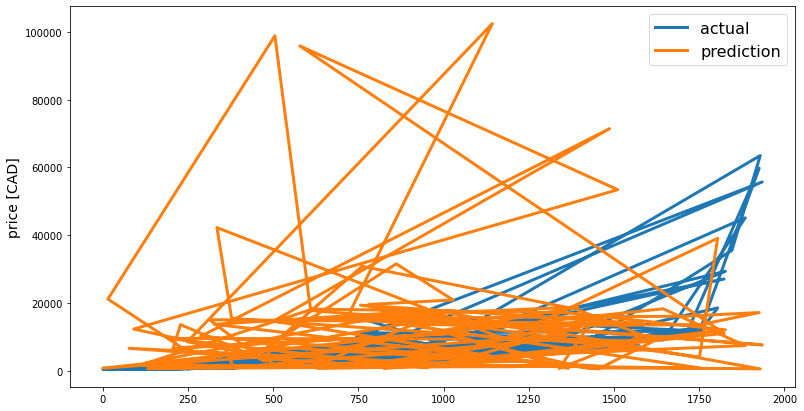

In [ ]:
%matplotlib inline

preds = test["Close"].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)
# plt.show()

## Normalizing Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
dataset.drop(['Date'], inplace=True, axis=1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(dataset)

In [ ]:
X_train.head()

,Open,High,Low,Adj Close,Volume,Open-dowjones,Close-dowjones,Open_gold,Close_gold,Open_Nikkei,Close_Nikkei,Open_dollar,Close_dollar,Open_Wti,Close_Wti,Europe Brent Spot Price FOB (Dollars per Barrel),Open_KRW,Close_KRW,trade-volume,market-cap,Close_S&P,miners-revenue,transaction-fees-usd,hash-rate,Close_FTSE,difficulty,n-transactions,avg-block-size,Price_Copper,Open_Copper,Price_ShanghaiCSI,Open_ShanghaiCSI,Open_VIX,Close_VIX,Open_STI,Close_STI,Open_BIDU,Close_BIDU,negativeVal,positiveVal,neutralVal
1138,3642.751953,3668.586914,3618.556885,3653.528564,6.480385e+09,25152.00000,25425.80078,1310.000000,1309.199951,1254,1272,97.059998,96.709999,7.830,7.9050,35.65,1124.930054,1125.020020,1.638669e+08,6.341464e+10,2744.73,6.031365e+06,126939.5576,4.610192e+07,7133.14,6.060000e+12,271573,1.304964,2.8145,2.8140,"3,330.34","3,306.35",15.230000,15.430000,3202.860107,3201.149902,169.039993,170.250000,91,156,239
1377,8229.840820,8627.706055,8169.298828,8595.740234,1.938494e+10,25983.90039,25983.90039,1507.699951,1506.099976,1291,1303,99.089996,99.120003,7.715,7.8625,35.65,1195.800049,1195.760010,1.448760e+08,1.490000e+11,2919.40,1.574389e+07,198859.4532,1.027556e+08,7166.50,1.280000e+13,328803,1.005810,2.6245,2.6205,"3,843.24","3,822.61",19.940001,18.639999,3097.959961,3089.899902,100.290001,99.900002,116,149,227
768,7755.490234,8509.110352,7236.790039,7621.299805,9.169280e+09,24893.30078,24893.30078,1325.400024,1311.599976,1450,1414,89.629997,90.260002,9.100,8.8600,35.65,1081.599976,1079.260010,2.089573e+09,1.340000e+11,2681.66,1.409391e+07,721166.9828,2.429314e+07,7279.42,2.610000e+12,173289,1.048305,3.2070,3.2065,"4,050.50","4,205.74",31.379999,27.730000,3445.830078,3383.770020,228.259994,222.500000,79,144,245
542,2590.570068,2615.250000,2376.290039,2478.449951,1.663280e+09,21409.59961,21409.59961,1260.199951,1246.300049,1316,1318,97.300003,97.430000,6.360,6.2900,35.65,1133.670044,1133.449951,2.587016e+07,4.429815e+10,2439.07,4.568838e+06,661056.9216,5.023770e+06,7446.80,7.120000e+11,180719,0.927725,2.7005,2.7000,"3,668.09","3,627.02",10.130000,9.900000,3223.600098,3209.469971,180.589996,178.460007,81,113,282
1697,11663.689450,11807.631840,11623.250000,11774.595700,2.068151e+10,28308.50000,28308.50000,1930.199951,1927.699951,1325,1329,93.199997,93.300003,3.959,3.9890,35.65,1190.050049,1191.199951,3.902760e+07,2.150000e+11,3431.28,1.225051e+07,698530.3493,1.284414e+08,6104.73,1.730000e+13,288728,1.251879,2.9755,2.9795,"4,755.85","4,746.40",22.870001,22.370001,2535.689941,2538.610107,123.870003,122.879997,67,159,263


In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    #input sequence (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    #forcast sequence (t, t+1, ..., t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    # if dropnan:
    #     agg.dropna(inplace=True)
    return agg

In [ ]:
new_shaped_Xtrain = series_to_supervised(X_train)
new_shaped_Xtest = series_to_supervised(X_test)



## Hyper-Parameter Tuning

## Training Data

## Interpretting Results